# Describing Caravan Customers

Association rules using sociodemographic  data

Capstone Project: Predicting and Explaining Caravan Policy Ownership

CIND820 Big Data Analytics Project

Student Name : Manohari Wijesooriya

##  **Introduction**

A Norwegian insurance company was interested in a machine learning solution to find best customers to market its caravan insurance product. Without sending mass email to all customers, it is cost effective for the company to identify best possible customers who will buy caravan insurance and only approach those customers.

Dataset: Insurance Company Benchmark (COIL 2000). This data set used in the CoIL 2000 Challenge contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data Dataset can be found in this link : https://archive.ics.uci.edu/ml/datasets/Insurance+Company+Benchmark+%28COIL+2000%29

**Research questions**

In this section, following research questions are solved.

Q2. **Describe** the actual or potential customers; and possibly explain why these customers buy a caravan policy.

Q5. What **frequent associations** can be identified in the product ownership data?

**What is Market Basket Analysis ?**

Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items.
It works by looking for combinations of items that occur together frequently in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy.

**Association Rules**

Association rules analysis is a technique to uncover how items are associated to each other. There are three common ways to measure association.


**SUPPORT** = A simple way to control complexity is to place a constraint that such rules must apply to some minimum percentage of the of the data

    support(A→C)=support(A∪C),range: [0,1]

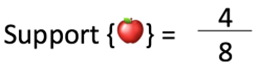

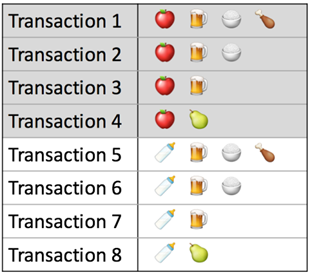



**CONFIDENCE** = The probability that B occurs when A; it is p(B|A), which in association mining.

confidence(A→C)=support(A→C)support(A),range: [0,1]

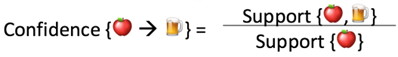


**LIFT** = the co-occurrence of A and B is the probability that we actually see the two together, compared to the probability that we would see the two together if they were unrelated to (independent of) each other.

lift(A→C)=confidence(A→C)support(C),range: [0,∞]

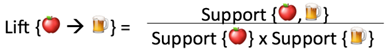




##  **Approach**

*  Exploratory Data Analysis (EDA):

*   Market Basket analysis

     Approach 1 - Apriori Algorithm

     Aprroach 2 - Fpgrowth Algorithm

*   Evaluation

       Matrics - confidence, support, lift

       run time





**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [ ]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns
#import squarify
import networkx as nx
import warnings
import matplotlib as mpl
#import gapminder as gapminder


%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

!pip install squarify
import squarify

**Loading COIL 2000 Dataset**

In [ ]:
# this is the original file. using for exploratory data analysis
#df1 = pd.read_csv("/content/ticdata2000_w_hd.csv")
# this is the file given for evaluation
#df2 = pd.read_csv("/content/ticeval2000_w_hd.csv")

# combining target column to validation file
#df3=df2.merge(df2_tg, left_index=True, right_index=True)
# using the encoded file prepared in prediction task
df_tr = pd.read_csv("/content/ticdata2000_w_hd.csv")
df_val = pd.read_csv("/content/ticeval2000_w_hd.csv")
df_val_tg = pd.read_csv("/content/tictgts2000.txt")
df_val_tg.columns=['po_ins_pol_caravan']
# combining target column to validation file
df_val2=df_val.merge(df_val_tg, left_index=True, right_index=True)


In [ ]:
# Using all data to make a larger sample to apply association rules
df = pd.concat([df_tr,df_val2])
df        = df.reset_index()
print(df_tr.shape)
print(df_val2.shape)
df.shape

(5822, 86)
(3999, 86)


(9821, 87)

In [ ]:
df.head()

,index,sd_cust_subtype,sd_no_of_houses,sd_avg_household,sd_avg_age_band,sd_cust_maintype,sd_religion_catholic,sd_religion_protestant,sd_religion_other,sd_religion_no,sd_rel_married,sd_rel_living_tg,sd_rel_other,sd_rel_no_singles,sd_hshold_wo_children,sd_hshold_w_children,sd_education_higher,sd_education_medium,sd_education_lower,sd_empst_high,sd_empst_Entrepr,sd_empst_farmer,sd_empst_mdl_mgmt,sd_empst_skill_labour,sd_empst_unskill_labour,sd_socialclassA,sd_socialclassB1,sd_socialclassB2,sd_socialclassC,sd_socialclassD,sd_rentedhouse,sd_homeowners,sd_car_1,sd_car_2,sd_car_0,sd_health_ins_national,sd_health_ins_private,sd_income_l_30k,sd_income_30k_45k,sd_income_45k_75k,sd_income_75k_122k,sd_income_g_123k,sd_income_avg,sd_p_power_class,po_ins_pol_thirdparty_pvt,po_ins_pol_thirdparty_firms,po_ins_pol_thirdparty_agri,po_ins_pol_car,po_ins_pol_del_van,po_ins_pol_motorcycle_sc,po_ins_pol_lorry,po_ins_pol_trailer,po_ins_pol_tractor,po_ins_pol_agri_machines,po_ins_pol_moped,po_ins_pol_life,po_ins_pol_accident_ins_pvt,po_ins_pol_accident_ins_fam,po_ins_pol_disability,po_ins_pol_fire,po_ins_pol_surfboard,po_ins_pol_boat,po_ins_pol_bicycle,po_ins_pol_property,po_ins_pol_social security,po_no_ins_pol_thirdparty_pvt,po_no_ins_pol_thirdparty_firms,po_no_ins_pol_thirdparty_agri,po_no_ins_pol_car,po_no_ins_pol_del_van,po_no_ins_pol_motorcycle_sc,po_no_ins_pol_lorry,po_no_ins_pol_trailer,po_no_ins_pol_tractor,po_no_ins_pol_agri_machines,po_no_ins_pol_moped,po_no_ins_pol_life,po_no_ins_pol_accident_ins_pvt,po_no_ins_pol_accident_ins_fam,po_no_ins_pol_disability,po_no_ins_pol_fire,po_no_ins_pol_surfboard,po_no_ins_pol_boat,po_no_ins_pol_bicycle,po_no_ins_pol_property,po_no_ins_pol_social security,po_ins_pol_caravan
0,0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# size of datasets
print('df ', df.shape)

df  (9821, 87)


# Data Preparation

Get all sociodemographic and product premium variables

As it require high computing power to run the model with all variables, we are running it with selected varaibles.

In [ ]:
col_list = ['sd_religion_other','sd_hshold_wo_children', 'sd_empst_skill_labour', 'sd_homeowners' , 'sd_health_ins_private' , 'sd_p_power_class' , 'sd_car_1','po_ins_pol_caravan']
df_sdp2 = df[col_list ]

In [ ]:
# adding index as customer id
df_sdp2       = df_sdp2.rename_axis('po_customer_id').reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_sdp2.head()
print(df_sdp2.shape)

,po_customer_id,sd_religion_other,sd_hshold_wo_children,sd_empst_skill_labour,sd_homeowners,sd_health_ins_private,sd_p_power_class,sd_car_1,po_ins_pol_caravan
0,0,1,2,5,8,1,3,8,0
1,1,1,4,0,7,3,4,7,0
2,2,2,4,0,2,0,4,7,0
3,3,2,3,1,4,2,4,9,0
4,4,1,4,0,5,4,3,6,0


(9821, 9)


use one-hot encoding to get product and premium values to columns

In [ ]:
# encoding  dataset
cat_cols=df_sdp2.iloc[:,1:9].columns  # list of columns to encode

# Create a copy of the data frame in memory with a different name
df_onehot=df_sdp2.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df_sdp2,  columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot.head()
print(df_onehot.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,po_customer_id,sd_religion_other_0,sd_religion_other_1,sd_religion_other_2,sd_religion_other_3,sd_religion_other_4,sd_religion_other_5,sd_hshold_wo_children_0,sd_hshold_wo_children_1,sd_hshold_wo_children_2,sd_hshold_wo_children_3,sd_hshold_wo_children_4,sd_hshold_wo_children_5,sd_hshold_wo_children_6,sd_hshold_wo_children_7,sd_hshold_wo_children_8,sd_hshold_wo_children_9,sd_empst_skill_labour_0,sd_empst_skill_labour_1,sd_empst_skill_labour_2,sd_empst_skill_labour_3,sd_empst_skill_labour_4,sd_empst_skill_labour_5,sd_empst_skill_labour_6,sd_empst_skill_labour_7,sd_empst_skill_labour_8,sd_empst_skill_labour_9,sd_homeowners_0,sd_homeowners_1,sd_homeowners_2,sd_homeowners_3,sd_homeowners_4,sd_homeowners_5,sd_homeowners_6,sd_homeowners_7,sd_homeowners_8,sd_homeowners_9,sd_health_ins_private_0,sd_health_ins_private_1,sd_health_ins_private_2,sd_health_ins_private_3,sd_health_ins_private_4,sd_health_ins_private_5,sd_health_ins_private_6,sd_health_ins_private_7,sd_health_ins_private_8,sd_health_ins_private_9,sd_p_power_class_1,sd_p_power_class_2,sd_p_power_class_3,sd_p_power_class_4,sd_p_power_class_5,sd_p_power_class_6,sd_p_power_class_7,sd_p_power_class_8,sd_car_1_0,sd_car_1_1,sd_car_1_2,sd_car_1_3,sd_car_1_4,sd_car_1_5,sd_car_1_6,sd_car_1_7,sd_car_1_8,sd_car_1_9,po_ins_pol_caravan_0,po_ins_pol_caravan_1
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


(9821, 67)


dropping varaibles with '_0' as it represent 0 premium (no policy)

In [ ]:
# filtering columns to drop
col_drop = df_onehot.filter(like ='_0').columns
# dropping columns
df_onehot.drop(col_drop, axis=1, inplace=True)

print(df_onehot.shape)

(9821, 60)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Transpose rows and columns

In [ ]:
# bring products to a columns
df_sdp2 = df_onehot.melt(id_vars=["po_customer_id"], var_name="product_name", value_name="product_count").sort_values(['po_customer_id', 'product_name']).reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_sdp2.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,po_customer_id,product_name,product_count
0,0,po_ins_pol_caravan_1,0
1,0,sd_car_1_1,0
2,0,sd_car_1_2,0
3,0,sd_car_1_3,0
4,0,sd_car_1_4,0
5,0,sd_car_1_5,0
6,0,sd_car_1_6,0
7,0,sd_car_1_7,0
8,0,sd_car_1_8,1
9,0,sd_car_1_9,0


In [ ]:
df_sdp3 = pd.DataFrame(df_sdp2[df_sdp2['product_count']>0])
df_sdp3.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,po_customer_id,product_name,product_count
8,0,sd_car_1_8,1
14,0,sd_empst_skill_labour_5,1
19,0,sd_health_ins_private_1,1
35,0,sd_homeowners_8,1
38,0,sd_hshold_wo_children_2,1
48,0,sd_p_power_class_3,1
54,0,sd_religion_other_1,1
66,1,sd_car_1_7,1
80,1,sd_health_ins_private_3,1
93,1,sd_homeowners_7,1


In [ ]:
# setting all product counts to 1
df_sdp3['product_count'] = np.where(df_sdp3['product_count'] >=1, 1, 0)
df_sdp3.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,po_customer_id,product_name,product_count
8,0,sd_car_1_8,1
14,0,sd_empst_skill_labour_5,1
19,0,sd_health_ins_private_1,1
35,0,sd_homeowners_8,1
38,0,sd_hshold_wo_children_2,1
48,0,sd_p_power_class_3,1
54,0,sd_religion_other_1,1
66,1,sd_car_1_7,1
80,1,sd_health_ins_private_3,1
93,1,sd_homeowners_7,1


# Exploratory Data Analysis

**Top 10 First Choices in Products**

In [ ]:
# get value counts of product and get top 5 products
sdp5=df_sdp3['product_name'].value_counts().iloc[:10]
print('sdp5 ', sdp5.head(15))
sdp6=sdp5.rename_axis('product_name2').reset_index()
sdp7=sdp6.rename(columns={'product_name2':'product_name', 'product_name':'prd_count'})


sdp5  sd_religion_other_1        3391
sd_car_1_6                 2822
sd_p_power_class_3         2556
sd_health_ins_private_2    2520
sd_hshold_wo_children_3    2517
sd_hshold_wo_children_4    2493
sd_car_1_7                 2338
sd_empst_skill_labour_2    2327
sd_religion_other_2        2294
sd_car_1_5                 2106
Name: product_name, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# getting records of top 10 products from the database. Keeping only selected products in the product file.
prd8=pd.merge(df_sdp3, sdp7, on='product_name')
prd8.drop('prd_count', axis=1, inplace=True)

prd8['product'] = 'Products'
products = nx.from_pandas_edgelist(prd8, source = 'product', target = 'product_name', edge_attr = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Products': Text(-0.0022027959513832773, 0.0009067007258962253, 'Products'),
 'sd_p_power_class_3': Text(0.5167525233661103, -0.8602706760842189, 'sd_p_power_class_3'),
 'sd_religion_other_1': Text(0.6655280037107174, 0.7638878668003043, 'sd_religion_other_1'),
 'sd_car_1_7': Text(-0.5143089626136816, 0.8558506451636312, 'sd_car_1_7'),
 'sd_hshold_wo_children_4': Text(0.9366270270647035, -0.3980114628155688, 'sd_hshold_wo_children_4'),
 'sd_religion_other_2': Text(0.9651394471889628, 0.22160003594206065, 'sd_religion_other_2'),
 'sd_health_ins_private_2': Text(-0.09082448830639982, -0.9988085172152685, 'sd_health_ins_private_2'),
 'sd_hshold_wo_children_3': Text(-0.9585295017970951, -0.22016757819799276, 'sd_hshold_wo_children_3'),
 'sd_car_1_6': Text(0.08360930196103152, 1.0, 'sd_car_1_6'),
 'sd_car_1_5': Text(-0.663349823903951, -0.7617238787259853, 'sd_car_1_5'),
 'sd_empst_skill_labour_2': Text(-0.9384407307190155, 0.39673686440714134, 'sd_empst_skill_labour_2')}

(-1.1605147414406312,
 1.167124686832499,
 -1.2086834115228717,
 1.2098748943076032)

Text(0.5, 1.0, 'Top 10 First Choices in Products')

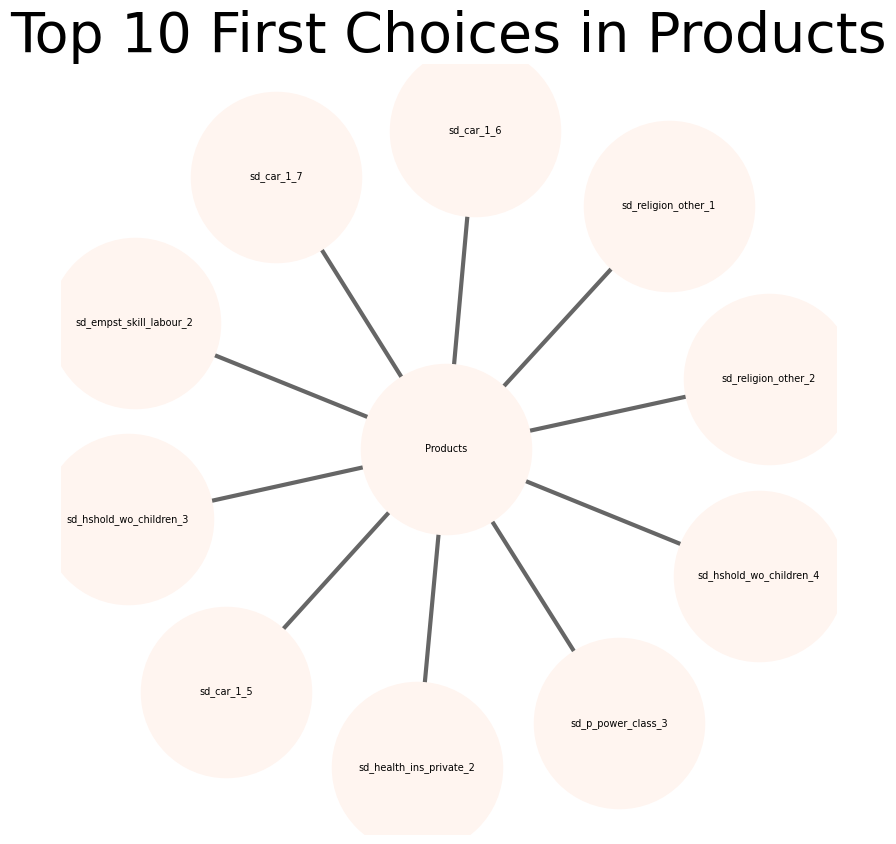

In [ ]:
# Visualise top 10 products
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(10,10)
pos=nx.spring_layout(products)
color=plt.cm.Reds(np.linspace(0,15,1))
nx.draw_networkx_nodes(products,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(products, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(products, pos, font_size = 7)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Products', fontsize = 40)

#plt.show()
plt.savefig("Top_10_Products.png")
#plt.savefig("Top_10_Products", format="PNG")

Bar plot most bought product

<Axes: >

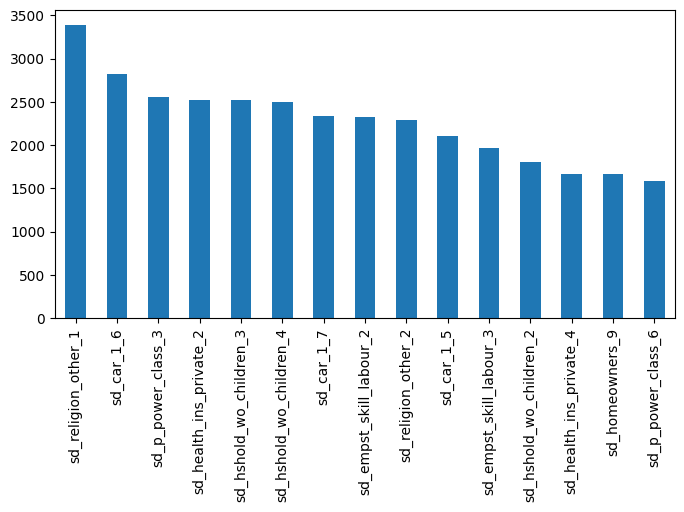

In [ ]:
# Bar plot - Top 10 products
df_freq_products=df_sdp3['product_name'].value_counts().iloc[:15]
fig=plt.figure(figsize=(8, 4))
df_freq_products.plot.bar()

Tree map of most bought product Premium size

In [ ]:
#array of most bought product
y=df_freq_products.head(5).to_frame()

<Axes: >

Text(0.5, 1.0, 'tree map for frequent products')

(0.0, 100.0, 0.0, 100.0)

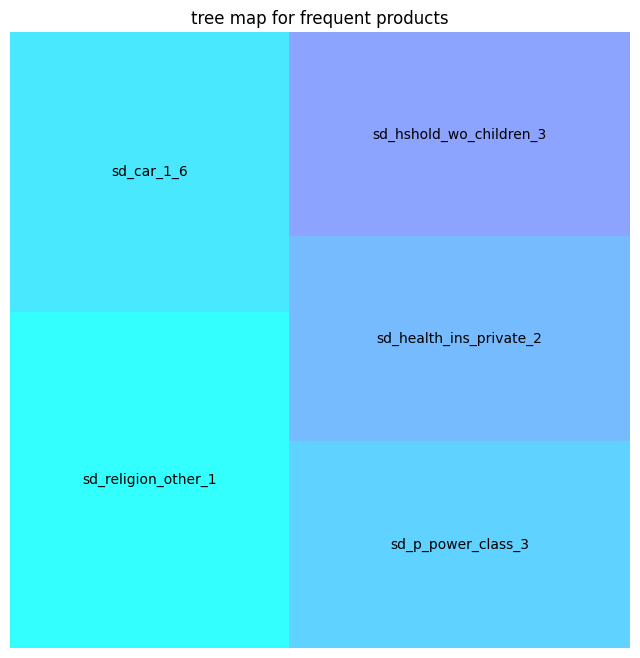

In [ ]:
plt.rcParams['figure.figsize']=(8,8)
color=plt.cm.cool(np.linspace(0,1,10))
squarify.plot(sizes=y.values,label=y.index,alpha=0.8,color=color)
plt.title('tree map for frequent products')
plt.axis('off')

# Market Basket Analysis



# Q5. What frequent associations can be identified in the product ownership data?

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Main product file.
product_name=df_sdp3
product_name.head()

,po_customer_id,product_name,product_count
8,0,sd_car_1_8,1
14,0,sd_empst_skill_labour_5,1
19,0,sd_health_ins_private_1,1
35,0,sd_homeowners_8,1
38,0,sd_hshold_wo_children_2,1


**Arranging Top Products**

In [ ]:
# counting each product as customers selected
productCountDf = product_name.groupby("product_name",as_index = False)['po_customer_id'].count()

In [ ]:
productCountDf.shape

(59, 2)

In [ ]:
# sort data, keeping highest count at the top
productCountDf.sort_values(by=['po_customer_id'], inplace=True, ascending=False)

**Selecting most frequent transactions**

Keeping much number of products (variables) here as all sociodemographic variables are added using postal code. Actual customer transactions are policy premium variables.

In [ ]:
topProdFrame = productCountDf.iloc[0:50,:]
productname= topProdFrame.loc[:,["product_name"]]

In [ ]:
topProdFrame.shape

(50, 2)

In [ ]:
topProdFrame

,product_name,po_customer_id
54,sd_religion_other_1,3391
6,sd_car_1_6,2822
48,sd_p_power_class_3,2556
20,sd_health_ins_private_2,2520
39,sd_hshold_wo_children_3,2517
40,sd_hshold_wo_children_4,2493
7,sd_car_1_7,2338
11,sd_empst_skill_labour_2,2327
55,sd_religion_other_2,2294
5,sd_car_1_5,2106


**Customer records containting the most frequently purchased products**

In [ ]:
MarketBasketdf = product_name[0:0]
for i in range(0,49):
    pId = productname.iloc[i]['product_name']
    stDf = product_name[product_name.product_name == pId ]
    MarketBasketdf = MarketBasketdf.append(stDf,ignore_index = False)

In [ ]:
MarketBasketdf.head()

,po_customer_id,product_name,product_count
54,0,sd_religion_other_1,1
113,1,sd_religion_other_1,1
290,4,sd_religion_other_1,1
644,10,sd_religion_other_1,1
762,12,sd_religion_other_1,1


In [ ]:
print(product_name.shape)
print(MarketBasketdf.shape)

(60546, 3)
(59995, 3)


**Putting the items into 1 transaction**

In [ ]:
basket = MarketBasketdf.groupby(['po_customer_id','product_name'])['product_count'].sum().unstack().reset_index().fillna(0).set_index('po_customer_id')

In [ ]:
basket.head()

product_name,po_ins_pol_caravan_1,sd_car_1_3,sd_car_1_4,sd_car_1_5,sd_car_1_6,sd_car_1_7,sd_car_1_8,sd_car_1_9,sd_empst_skill_labour_1,sd_empst_skill_labour_2,sd_empst_skill_labour_3,sd_empst_skill_labour_4,sd_empst_skill_labour_5,sd_empst_skill_labour_6,sd_health_ins_private_1,sd_health_ins_private_2,sd_health_ins_private_3,sd_health_ins_private_4,sd_health_ins_private_5,sd_health_ins_private_6,sd_health_ins_private_7,sd_homeowners_1,sd_homeowners_2,sd_homeowners_3,sd_homeowners_4,sd_homeowners_5,sd_homeowners_6,sd_homeowners_7,sd_homeowners_8,sd_homeowners_9,sd_hshold_wo_children_1,sd_hshold_wo_children_2,sd_hshold_wo_children_3,sd_hshold_wo_children_4,sd_hshold_wo_children_5,sd_hshold_wo_children_6,sd_hshold_wo_children_7,sd_p_power_class_1,sd_p_power_class_2,sd_p_power_class_3,sd_p_power_class_4,sd_p_power_class_5,sd_p_power_class_6,sd_p_power_class_7,sd_p_power_class_8,sd_religion_other_1,sd_religion_other_2,sd_religion_other_3,sd_religion_other_4
po_customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


One Hot Encoding

In [ ]:
# Converted the units into 1 encoded value
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [ ]:
basket_sets = basket.applymap(encode_units)

In [ ]:
basket_sets.head()

product_name,po_ins_pol_caravan_1,sd_car_1_3,sd_car_1_4,sd_car_1_5,sd_car_1_6,sd_car_1_7,sd_car_1_8,sd_car_1_9,sd_empst_skill_labour_1,sd_empst_skill_labour_2,sd_empst_skill_labour_3,sd_empst_skill_labour_4,sd_empst_skill_labour_5,sd_empst_skill_labour_6,sd_health_ins_private_1,sd_health_ins_private_2,sd_health_ins_private_3,sd_health_ins_private_4,sd_health_ins_private_5,sd_health_ins_private_6,sd_health_ins_private_7,sd_homeowners_1,sd_homeowners_2,sd_homeowners_3,sd_homeowners_4,sd_homeowners_5,sd_homeowners_6,sd_homeowners_7,sd_homeowners_8,sd_homeowners_9,sd_hshold_wo_children_1,sd_hshold_wo_children_2,sd_hshold_wo_children_3,sd_hshold_wo_children_4,sd_hshold_wo_children_5,sd_hshold_wo_children_6,sd_hshold_wo_children_7,sd_p_power_class_1,sd_p_power_class_2,sd_p_power_class_3,sd_p_power_class_4,sd_p_power_class_5,sd_p_power_class_6,sd_p_power_class_7,sd_p_power_class_8,sd_religion_other_1,sd_religion_other_2,sd_religion_other_3,sd_religion_other_4
po_customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


size and shape of basket

In [ ]:
basket_sets.size

481229

In [ ]:
basket_sets.shape

(9821, 49)

Creating dummy file

In [ ]:
# taking a sample of the basket
dummy=basket_sets.head(1000)

# Apriori Algorithm

Apriori is a join based algorithm for frequent item set mining and association rule learning over a sample set. It proceeds by identifying the frequent individual items in the sample and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the sample.

**Importing Apriori and Association rules Libraries**

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

**Training the Model**

We set the mininum support as 0.001 (rules apply to 0.1% of data), maximum number that being analysed in the basket is 3.

We are doing first pruning and see what we get from the result

In [ ]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets_apri = apriori(dummy, min_support=0.001, max_len =3,  use_colnames=True)
# Association rules using Apriori Algorithm
apriori_rules = association_rules(frequent_itemsets_apri, metric="lift", min_threshold= 1)

In [ ]:
# Sort values based on confidence
apriori_rules2=apriori_rules.sort_values("confidence",ascending=False)

In [ ]:
apriori_rules2.shape

(21380, 10)

from sample of 8000 records, apriori algorithm has mined 706 rules:
rule with low support and high confidence is prefered.  ♈

In [ ]:
# Plot Support Vs Coverage(confidence)
def plot_metrics_relationship(rule_matrix, al, col1, col2):
    """
    desc: shows the relationship between the two input columns
    @params:
        - rule_matrix: the matrix containing the result of a rule (apriori or Fp Growth)
        - col1: first column
        - col2: second column
    """
    fit = np.polyfit(rule_matrix[col1], rule_matrix[col2], 1)
    fit_funt = np.poly1d(fit)
    plt.plot(rule_matrix[col1], rule_matrix[col2], 'yo', rule_matrix[col1],
    fit_funt(rule_matrix[col1]))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('{} {} vs {}'.format(al, col1, col2))

    plt.savefig('Support vs confidence')

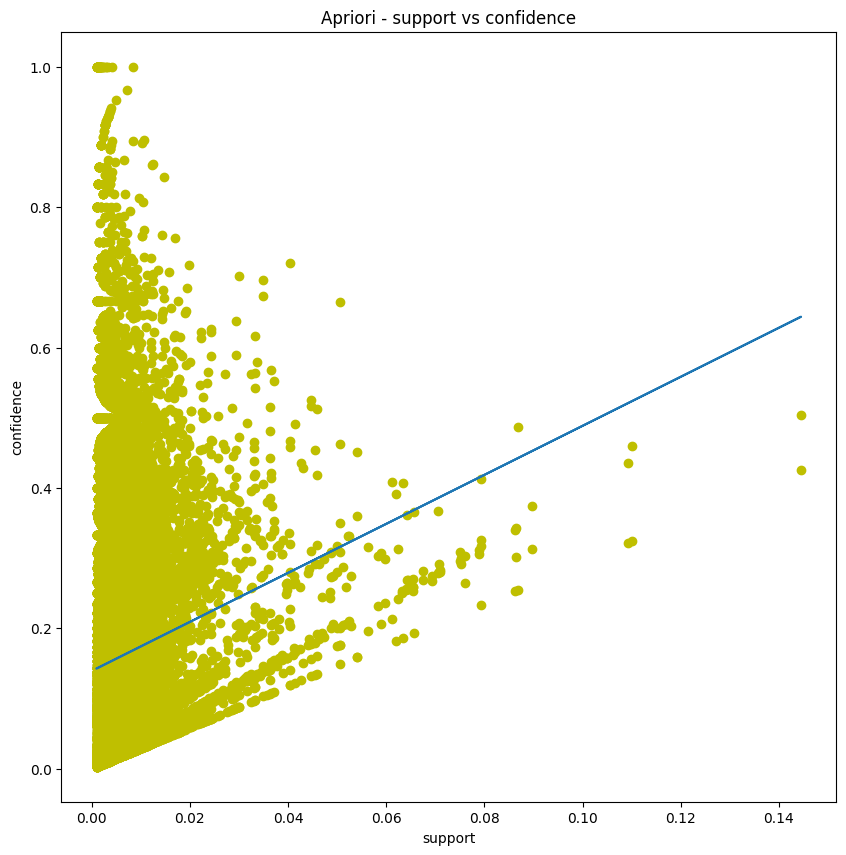

In [ ]:
plot_metrics_relationship(apriori_rules2, al='Apriori -', col1='support', col2='confidence')

Rules for caravan product

In [ ]:
apriori_caravan = apriori_rules2[ (apriori_rules2['consequents'] == {'po_ins_pol_caravan_1'}      )]
apriori_caravan.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1916,"(sd_health_ins_private_7, sd_p_power_class_5)",(po_ins_pol_caravan_1),0.00275,0.05825,0.00125,0.454545,7.803355,0.001090,1.726542,0.874254
979,"(sd_car_1_5, sd_hshold_wo_children_6)",(po_ins_pol_caravan_1),0.00350,0.05825,0.00100,0.285714,4.904966,0.000796,1.318450,0.798921
2262,"(sd_hshold_wo_children_5, sd_religion_other_3)",(po_ins_pol_caravan_1),0.00400,0.05825,0.00100,0.250000,4.291845,0.000767,1.255667,0.770080
2273,"(sd_p_power_class_7, sd_hshold_wo_children_6)",(po_ins_pol_caravan_1),0.00625,0.05825,0.00150,0.240000,4.120172,0.001136,1.239145,0.762055
1339,"(sd_religion_other_3, sd_car_1_9)",(po_ins_pol_caravan_1),0.00475,0.05825,0.00100,0.210526,3.614186,0.000723,1.192883,0.726765


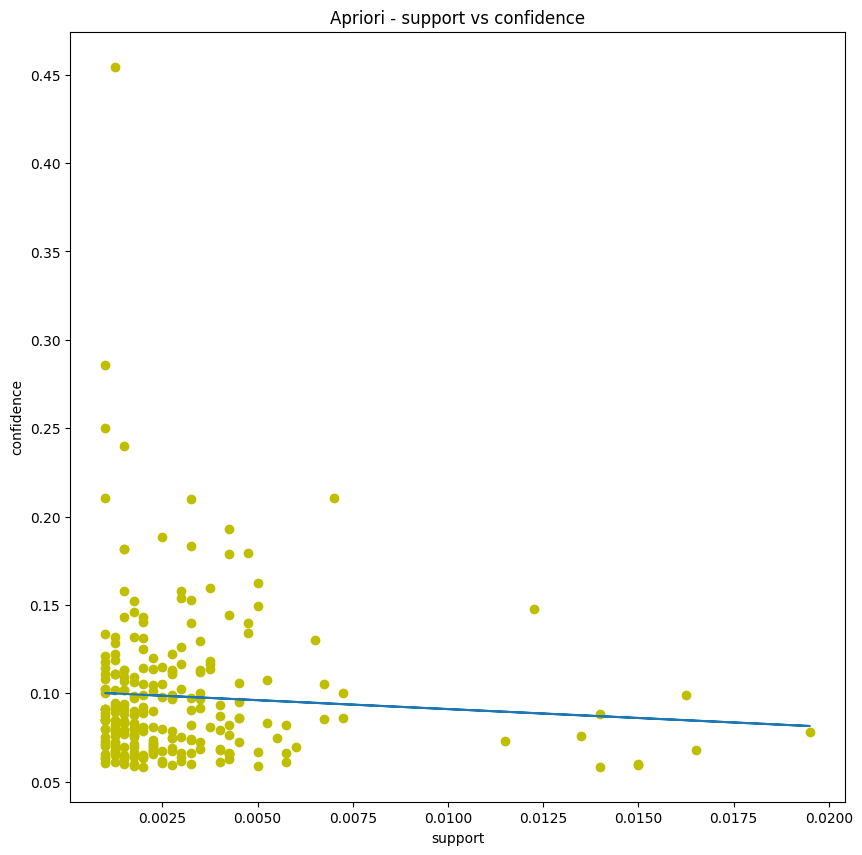

In [ ]:
plot_metrics_relationship(apriori_caravan, al='Apriori -', col1='support', col2='confidence')

With scatterplot, we can have quick glimpse, where the boundary should be and what metric should be set to filter out the frequent itemsets.

# Recommendations using Apriori Algorithm

In [ ]:
filtered_rules_apriori_caravan =apriori_caravan[(apriori_caravan['antecedent support'] > 0.002)&
                        (apriori_caravan['confidence'] > 0.18) &
                        (apriori_caravan['lift'] > 1)]

Selecting number of rules

In [ ]:
filtered_rules_apriori_caravan.shape

(12, 10)

In [ ]:
filtered_rules_apriori_caravan

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1916,"(sd_health_ins_private_7, sd_p_power_class_5)",(po_ins_pol_caravan_1),0.00275,0.05825,0.00125,0.454545,7.803355,0.001090,1.726542,0.874254
979,"(sd_car_1_5, sd_hshold_wo_children_6)",(po_ins_pol_caravan_1),0.00350,0.05825,0.00100,0.285714,4.904966,0.000796,1.318450,0.798921
2262,"(sd_hshold_wo_children_5, sd_religion_other_3)",(po_ins_pol_caravan_1),0.00400,0.05825,0.00100,0.250000,4.291845,0.000767,1.255667,0.770080
2273,"(sd_p_power_class_7, sd_hshold_wo_children_6)",(po_ins_pol_caravan_1),0.00625,0.05825,0.00150,0.240000,4.120172,0.001136,1.239145,0.762055
1339,"(sd_religion_other_3, sd_car_1_9)",(po_ins_pol_caravan_1),0.00475,0.05825,0.00100,0.210526,3.614186,0.000723,1.192883,0.726765
2146,"(sd_homeowners_9, sd_p_power_class_7)",(po_ins_pol_caravan_1),0.03325,0.05825,0.00700,0.210526,3.614186,0.005063,1.192883,0.748190
2185,"(sd_p_power_class_7, sd_hshold_wo_children_2)",(po_ins_pol_caravan_1),0.01550,0.05825,0.00325,0.209677,3.599612,0.002347,1.191602,0.733563
1435,"(sd_p_power_class_7, sd_empst_skill_labour_1)",(po_ins_pol_caravan_1),0.02200,0.05825,0.00425,0.193182,3.316426,0.002969,1.167239,0.714183
966,"(sd_car_1_5, sd_homeowners_9)",(po_ins_pol_caravan_1),0.01325,0.05825,0.00250,0.188679,3.239129,0.001728,1.160762,0.700557
1325,"(sd_p_power_class_7, sd_car_1_9)",(po_ins_pol_caravan_1),0.01775,0.05825,0.00325,0.183099,3.143323,0.002216,1.152832,0.694187


Customers with private health insurance category 7 and in purchasing power class 5 are more likely buy a caravan policy. ♈

In [ ]:
def recommendations_using_Apriori(item):
    recommend = []
    for i in range(0,10):
        if item == filtered_rules_apriori_caravan.iloc[i,1]:
            recommend.append(filtered_rules_apriori_caravan.iloc[i,0])

    return recommend

In [ ]:
# rules selecting caravan policy
product_name = {'po_ins_pol_caravan_1'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'sd_health_ins_private_7', 'sd_p_power_class_5'})
frozenset({'sd_car_1_5', 'sd_hshold_wo_children_6'})
frozenset({'sd_hshold_wo_children_5', 'sd_religion_other_3'})
frozenset({'sd_p_power_class_7', 'sd_hshold_wo_children_6'})
frozenset({'sd_religion_other_3', 'sd_car_1_9'})


Visualise rules

In [ ]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

<Figure size 300x600 with 0 Axes>

<Axes: >

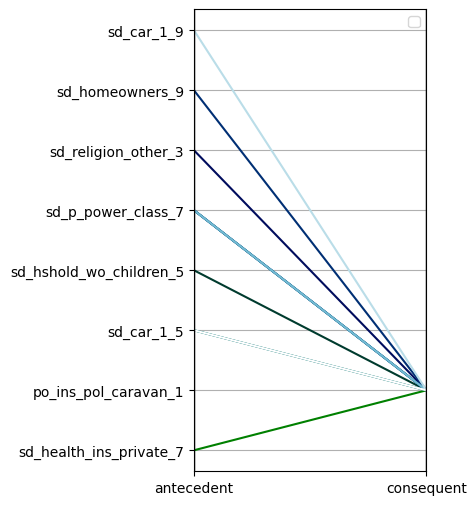

In [ ]:
# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(filtered_rules_apriori_caravan)
# Generate parallel coordinates plot
plt.figure(figsize=(3,6))
parallel_coordinates(coords, 'rule',colormap = 'ocean')
plt.legend([])
plt.show()

# Fpgrowth Algorithm

**Importing Fpgrowth Libraries**

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

**Training the Model**

In [ ]:
# Frequent Items with support 0.07% using Fpgrowth Algorithm
freq_items=fpgrowth(dummy,min_support=.0007,max_len =3,  use_colnames=True)
# Association Rules using Fpgrowth Algorithm
fpgrowth_rules=association_rules(freq_items,metric="lift",min_threshold=1)

In [ ]:
# Sort values based on confidence
fpgrowth_rules2=fpgrowth_rules.sort_values("confidence",ascending=False)

In [ ]:
fpgrowth_rules2.shape

(23064, 10)

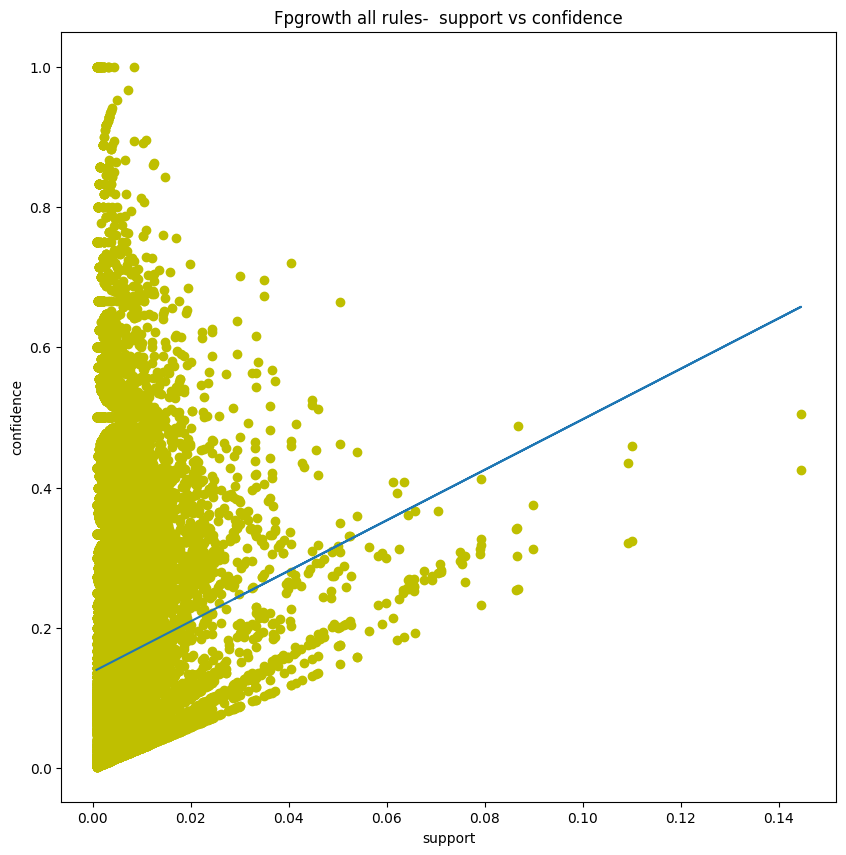

In [ ]:
plot_metrics_relationship(fpgrowth_rules, al='Fpgrowth all rules- ',col1='support', col2='confidence')

In [ ]:
# rules selecting caravan policy
fpg_caravan = fpgrowth_rules2[ (fpgrowth_rules2['consequents']== {'po_ins_pol_caravan_1'}      )]
#fpg_caravan_2=fpg_caravan[  (fpg_caravan['confidence'] >= 0.2) ]
#fpg_caravan_2=fpg_caravan.sort_values(by =['confidence'], ascending=False)
fpg_caravan

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
23018,"(sd_health_ins_private_7, sd_p_power_class_5)",(po_ins_pol_caravan_1),0.00275,0.05825,0.00125,0.454545,7.803355,0.001090,1.726542,0.874254
13407,"(sd_car_1_5, sd_hshold_wo_children_6)",(po_ins_pol_caravan_1),0.00350,0.05825,0.00100,0.285714,4.904966,0.000796,1.318450,0.798921
10610,"(sd_hshold_wo_children_5, sd_religion_other_3)",(po_ins_pol_caravan_1),0.00400,0.05825,0.00100,0.250000,4.291845,0.000767,1.255667,0.770080
13393,"(sd_p_power_class_7, sd_hshold_wo_children_6)",(po_ins_pol_caravan_1),0.00625,0.05825,0.00150,0.240000,4.120172,0.001136,1.239145,0.762055
20314,"(sd_p_power_class_6, sd_hshold_wo_children_7)",(po_ins_pol_caravan_1),0.00325,0.05825,0.00075,0.230769,3.961704,0.000561,1.224275,0.750021
10671,"(sd_religion_other_3, sd_car_1_9)",(po_ins_pol_caravan_1),0.00475,0.05825,0.00100,0.210526,3.614186,0.000723,1.192883,0.726765
18840,"(sd_homeowners_9, sd_p_power_class_7)",(po_ins_pol_caravan_1),0.03325,0.05825,0.00700,0.210526,3.614186,0.005063,1.192883,0.748190
18585,"(sd_p_power_class_7, sd_hshold_wo_children_2)",(po_ins_pol_caravan_1),0.01550,0.05825,0.00325,0.209677,3.599612,0.002347,1.191602,0.733563
18859,"(sd_p_power_class_7, sd_empst_skill_labour_1)",(po_ins_pol_caravan_1),0.02200,0.05825,0.00425,0.193182,3.316426,0.002969,1.167239,0.714183
18650,"(sd_car_1_5, sd_homeowners_9)",(po_ins_pol_caravan_1),0.01325,0.05825,0.00250,0.188679,3.239129,0.001728,1.160762,0.700557


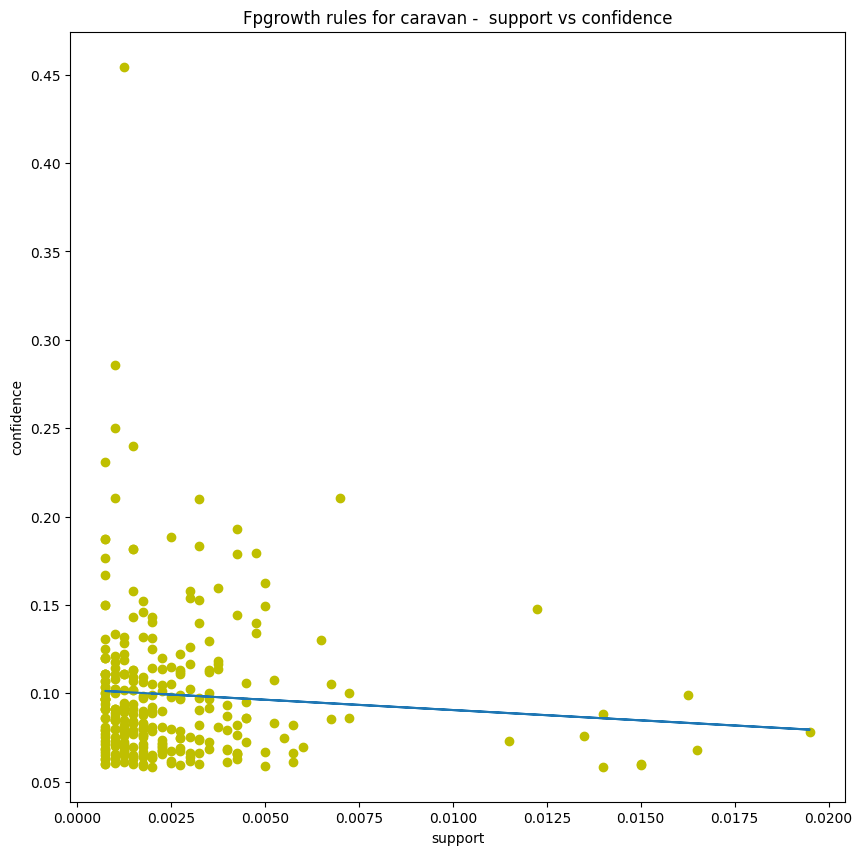

In [ ]:
plot_metrics_relationship(fpg_caravan, al='Fpgrowth rules for caravan - ',col1='support', col2='confidence')

# Recommendations using Fpgrowth Algorithm

In [ ]:
fpgrowth_rules.shape

(23064, 10)

With scatterplot, we can have quick glimpse, where the boundary should be and what metric should be set to filter out the frequent itemsets.

In [ ]:
filtered_rules_fpg_caravan =fpg_caravan[(fpg_caravan['antecedent support'] > 0.004)&
                        (fpg_caravan['confidence'] > 0.18) &
                        (fpg_caravan['lift'] > 2)]


In [ ]:
filtered_rules_fpg_caravan

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13393,"(sd_p_power_class_7, sd_hshold_wo_children_6)",(po_ins_pol_caravan_1),0.00625,0.05825,0.00150,0.240000,4.120172,0.001136,1.239145,0.762055
10671,"(sd_religion_other_3, sd_car_1_9)",(po_ins_pol_caravan_1),0.00475,0.05825,0.00100,0.210526,3.614186,0.000723,1.192883,0.726765
18840,"(sd_homeowners_9, sd_p_power_class_7)",(po_ins_pol_caravan_1),0.03325,0.05825,0.00700,0.210526,3.614186,0.005063,1.192883,0.748190
18585,"(sd_p_power_class_7, sd_hshold_wo_children_2)",(po_ins_pol_caravan_1),0.01550,0.05825,0.00325,0.209677,3.599612,0.002347,1.191602,0.733563
18859,"(sd_p_power_class_7, sd_empst_skill_labour_1)",(po_ins_pol_caravan_1),0.02200,0.05825,0.00425,0.193182,3.316426,0.002969,1.167239,0.714183
18650,"(sd_car_1_5, sd_homeowners_9)",(po_ins_pol_caravan_1),0.01325,0.05825,0.00250,0.188679,3.239129,0.001728,1.160762,0.700557
18905,"(sd_p_power_class_7, sd_car_1_9)",(po_ins_pol_caravan_1),0.01775,0.05825,0.00325,0.183099,3.143323,0.002216,1.152832,0.694187
19437,"(sd_car_1_5, sd_p_power_class_8)",(po_ins_pol_caravan_1),0.00825,0.05825,0.00150,0.181818,3.121342,0.001019,1.151028,0.685279
22964,"(sd_car_1_9, sd_health_ins_private_7)",(po_ins_pol_caravan_1),0.00825,0.05825,0.00150,0.181818,3.121342,0.001019,1.151028,0.685279


In [ ]:
filtered_rules_fpg_caravan.shape

(9, 10)

In [ ]:
def recommendations_using_Fpgrowth(item):
    recommend = []
    for i in range(0,9):
        if item == filtered_rules_fpg_caravan.iloc[i,1]:
            recommend.append(filtered_rules_fpg_caravan.iloc[i,0])

    return recommend

**5 Recommendations with caravan product**

In [ ]:
# rules selecting caravan policy
product_name = {'po_ins_pol_caravan_1'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'sd_p_power_class_7', 'sd_hshold_wo_children_6'})
frozenset({'sd_religion_other_3', 'sd_car_1_9'})
frozenset({'sd_homeowners_9', 'sd_p_power_class_7'})
frozenset({'sd_p_power_class_7', 'sd_hshold_wo_children_2'})
frozenset({'sd_p_power_class_7', 'sd_empst_skill_labour_1'})


Association rules for caravan policy

{'sd_p_power_class_7', 'sd_hshold_wo_children_6'}

{'sd_religion_other_3', 'sd_car_1_9'}

{'sd_homeowners_9', 'sd_p_power_class_7'}

({'sd_p_power_class_7', 'sd_hshold_wo_children_2'}

({'sd_p_power_class_7', 'sd_empst_skill_labour_1'}

# Model Evaluation

One of the most important features of any frequent itemset mining algorithm is that it should take lower timing and memory.

Best algorithm is used in run time of 2 models.

**Calculating Run Time of Apriori Algorithm**

In [ ]:
import time

l=[0.0005,0.0006,0.0007,0.0008] # # selection of support
t=[]
for i in l:
    t1=time.time()
    apriori(dummy,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

Output hidden; open in https://colab.research.google.com to view.

**Calculating Run Time of Fpgrowth Algorithm**

In [ ]:
l=[0.0005,0.0006,0.0007,0.0008] # selection of support
f=[]
for i in l:
    t1=time.time()
    fpgrowth(dummy,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

Output hidden; open in https://colab.research.google.com to view.

**Graph of Run Time between Apriori and Fpgrowth Algorithm**

<Axes: >

<Axes: >

Text(0.5, 0, 'Min_support Threshold')

Text(0, 0.5, 'Run Time in ms')

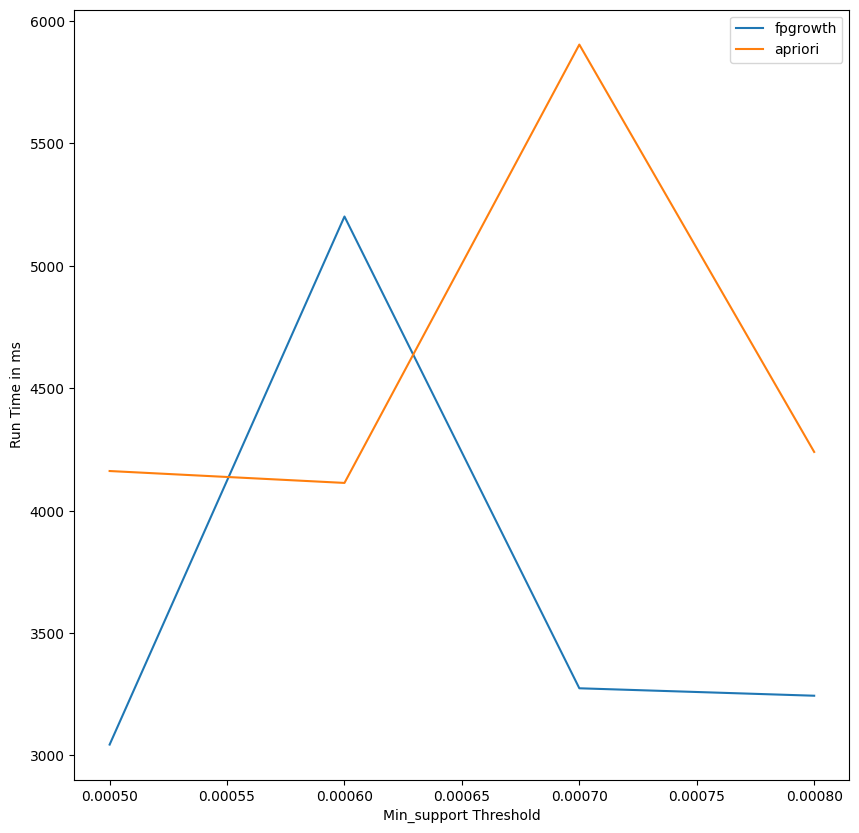

In [ ]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")

plt.savefig("Ap- FPG Runtime")

FPgrowth is the best algorithm as it takes less run time

Apriori and Fpgrowth give same set of rules. We are selecting Fpgrowth algorithm as it gives results in less run time. ♈

**Explain caravan customer** - using product premium details - choice of policies

**Results**

Frequent assocition with caravan policy

{'sd_p_power_class_7', 'sd_hshold_wo_children_6'}

{'sd_religion_other_3', 'sd_car_1_9'}

{'sd_homeowners_9', 'sd_p_power_class_7'}

({'sd_p_power_class_7', 'sd_hshold_wo_children_2'}

({'sd_p_power_class_7', 'sd_empst_skill_labour_1'}

customers who are in private health insurance category 7 (76 - 88%) and purchasing power class 5 (50 - 62%) are buying caravan insurance policy.  ♈